# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


# Read Data 

In [2]:
data = pd.read_csv('C:\DATASCIENCE\RonyProject\ML\data.csv')

In [3]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The `Unnamed: 32` column has all its values set to null.

In [6]:
data.duplicated().sum()

0

# Data Cleaning

Drop the `Unnamed: 32` column and the `ID` column because it has no significance.

In [7]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# EDA

`Target feature distribution`

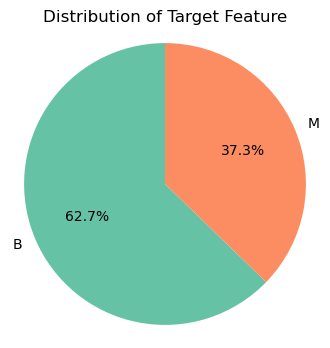

In [8]:
Target = data['diagnosis'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(Target, labels=Target.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribution of Target Feature')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

`The target feature labels are imbalance`

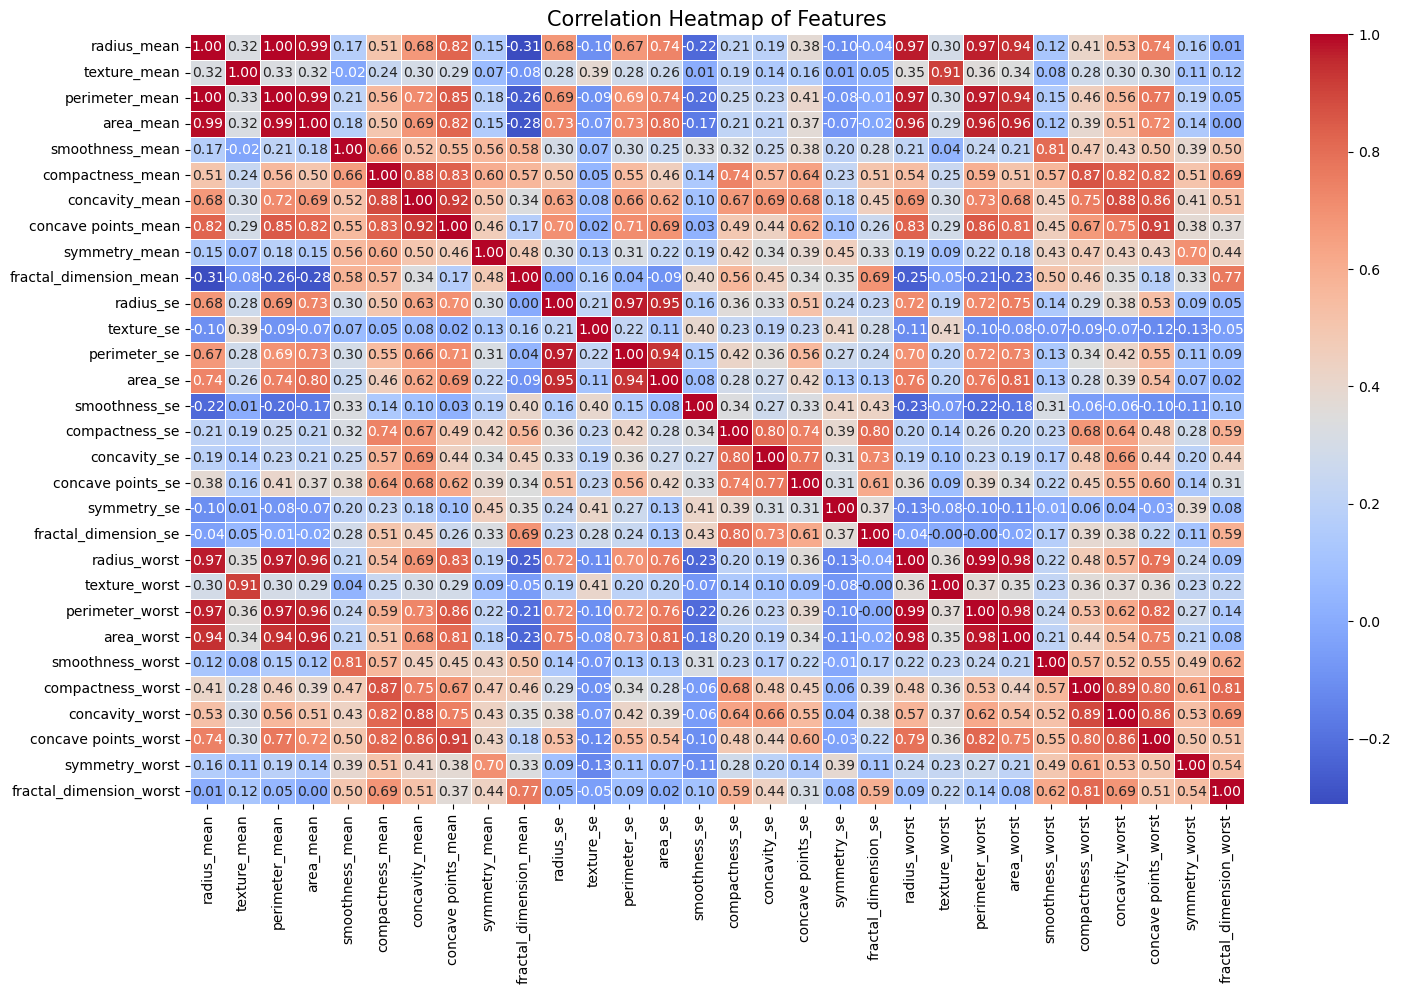

In [9]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(17, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features', size=15)
plt.show()

`There is very high multicollinearity.`

In [10]:
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M':1}) 

In [11]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

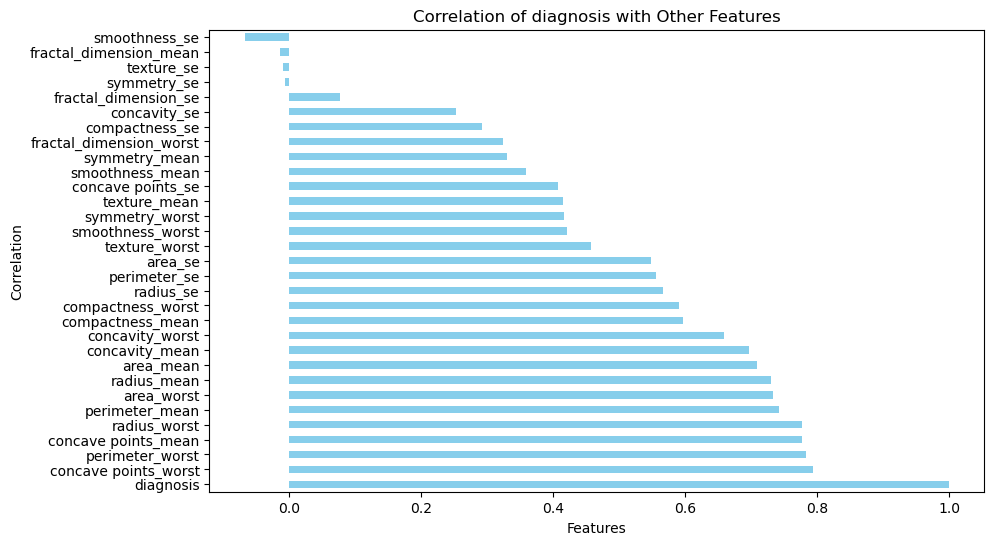

In [12]:
corr_vector = data.corr(numeric_only=True)['diagnosis'].sort_values(ascending=False)
corr_vector.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title(f'Correlation of diagnosis with Other Features')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.show()

# Data Splitting

In [13]:
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=42)

In [15]:
x_train.shape, x_test.shape

((483, 30), (86, 30))

# Data Transformation

In [16]:
scaler = StandardScaler()
x_train = pd.DataFrame(data=scaler.fit_transform(x_train), columns=x.columns)
x_test = pd.DataFrame(data=scaler.transform(x_test), columns=x.columns)

##  LogisticRegression

In [17]:
LR = LogisticRegression(random_state=42)

In [18]:
LR.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [19]:
y_pred_train = LR.predict(x_train)
train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)
train_f1 = f1_score(y_true=y_train, y_pred=y_pred_train, average='binary')
print('train accuracy: {}'.format(train_acc))
print('train f1_score: {}'.format(train_f1))
train_cm = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
plt.show()

train accuracy: 0.989648033126294
train f1_score: 0.9859154929577464


In [20]:
y_pred_test = LR.predict(x_test)
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred_test)
test_f1 = f1_score(y_true=y_test, y_pred=y_pred_test, average='binary')
print('test accuracy: {}'.format(test_acc))
print('test f1_score: {}'.format(test_f1))
test_cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
plt.show()

test accuracy: 0.9883720930232558
test f1_score: 0.9841269841269841


## KNN

In [21]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [22]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred_train = knn.predict(x_train)
train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)
train_f1 = f1_score(y_true=y_train, y_pred=y_pred_train, average='binary')
print('train accuracy: {}'.format(train_acc))
print('train f1_score: {}'.format(train_f1))
train_cm = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
plt.show()

train accuracy: 0.9751552795031055
train f1_score: 0.9657142857142857


## DecisionTree

In [24]:
DT = DecisionTreeClassifier(max_depth=5, random_state=42)

In [25]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [26]:
y_pred_train = DT.predict(x_train)
train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)
train_f1 = f1_score(y_true=y_train, y_pred=y_pred_train, average='binary')
print('train accuracy: {}'.format(train_acc))
print('train f1_score: {}'.format(train_f1))
train_cm = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
plt.show()

train accuracy: 0.9813664596273292
train f1_score: 0.9745042492917847


In [27]:
y_pred_test = DT.predict(x_test)
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred_test)
test_f1 = f1_score(y_true=y_test, y_pred=y_pred_test, average='binary')
print('test accuracy: {}'.format(test_acc))
print('test f1_score: {}'.format(test_f1))
test_cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
plt.show()

test accuracy: 0.9651162790697675
test f1_score: 0.9523809523809523


## RandomForest

In [28]:
RF = RandomForestClassifier(n_estimators=150, max_depth=7)

In [29]:
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=150)

In [30]:
y_pred_train = RF.predict(x_train)
train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)
train_f1 = f1_score(y_true=y_train, y_pred=y_pred_train, average='binary')
print('train accuracy: {}'.format(train_acc))
print('train f1_score: {}'.format(train_f1))
train_cm = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
plt.show()

train accuracy: 0.9979296066252588
train f1_score: 0.9972144846796658


In [31]:
y_pred_test = RF.predict(x_test)
test_acc = accuracy_score(y_true=y_test, y_pred=y_pred_test)
test_f1 = f1_score(y_true=y_test, y_pred=y_pred_test, average='binary')
print('test accuracy: {}'.format(test_acc))
print('test f1_score: {}'.format(test_f1))
test_cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
plt.show()

test accuracy: 0.9883720930232558
test f1_score: 0.9841269841269841


# Conclusion



1. After analyzing the dataset, we found that it is imbalanced. Therefore, in the evaluation step, we focused on the **F1 score** rather than accuracy.



2. The data distribution showed some skewness and outliers, so I applied a **Standard Scaler** to address these issues.



3. In the modeling step, I tested four models:

   - As a **baseline model**, I used **Logistic Regression**, which achieved an F1 score of **98** on the training set and **98** on the test set.

   - The second model was **KNN (K-Nearest Neighbors)**, but it did not perform as well as other models for this dataset.

   - The third model was a **Decision Tree**, but the baseline Logistic Regression model performed better.

   - The fourth and final model was **Random Forest**, which achieved an F1 score of **99** on the training set and **98** on the test set, making it the best-performing model overall.